# Wind Power Production 
**Life cycle of Machine learning model**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Modeling
* Model Evaluation
* Model Deployment

## 2) Data Collection

* The Dataset is collected from this link https://www.kaggle.com/datasets/henriupton/wind-power-production-us-2001-2023



### 2.1 Import Required Packages

* **Importing Pandas, Numpy, Matplotlib, Seaborn, Ploty Libraries for various Operations**

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

%matplotlib inline
#Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)

### 2.2 Import CSV as dataset

* **Reading the CSV and storing it as Pandas DataFrame**

In [124]:
# Create Dataframe
df = pd.read_csv("C:/Users/dhanu/Downloads/New folder/New folder/wppusdata.csv")

# Print shape of dataset
print(df.shape)

(266, 126)


In [125]:
df.head()

,date,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,other_new_jersey,other_new_york,other_pennsylvania,other_east_north_central,other_illinois,other_indiana,other_michigan,other_ohio,other_wisconsin,other_west_north_central,other_iowa,other_kansas,other_minnesota,other_missouri,other_nebraska,other_north_dakota,other_south_dakota,other_south_atlantic,other_delaware,other_district_of_columbia,other_florida,other_georgia,other_maryland,other_north_carolina,other_south_carolina,other_virginia,other_west_virginia,other_east_south_central,other_alabama,other_kentucky,other_mississippi,other_tennessee,other_west_south_central,other_arkansas,other_louisiana,other_oklahoma,other_texas,other_mountain,other_arizona,other_colorado,other_idaho,other_montana,other_nevada,other_new_mexico,other_utah,other_wyoming,other_pacific_contiguous,other_california,other_oregon,other_washington,other_pacific_noncontiguous,other_alaska,other_hawaii,wind,wind_united_states,wind_new_england,wind_connecticut,wind_maine,wind_massachusetts,wind_new_hampshire,wind_rhode_island,wind_vermont,wind_middle_atlantic,wind_new_jersey,wind_new_york,wind_pennsylvania,wind_east_north_central,wind_illinois,wind_indiana,wind_michigan,wind_ohio,wind_wisconsin,wind_west_north_central,wind_iowa,wind_kansas,wind_minnesota,wind_missouri,wind_nebraska,wind_north_dakota,wind_south_dakota,wind_south_atlantic,wind_delaware,wind_district_of_columbia,wind_florida,wind_georgia,wind_maryland,wind_north_carolina,wind_south_carolina,wind_virginia,wind_west_virginia,wind_east_south_central,wind_alabama,wind_kentucky,wind_mississippi,wind_tennessee,wind_west_south_central,wind_arkansas,wind_louisiana,wind_oklahoma,wind_texas,wind_mountain,wind_arizona,wind_colorado,wind_idaho,wind_montana,wind_nevada,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
0,Jan-01,6025,678,75,348,113,91,10,42,371,66,154,151,402,59,9,195,42,97,234,53,--,178,1,2,1,0,1056,--,--,335,261,27,157,115,161,1,591,401,1,115,75,558,137,226,20,176,209,0,9,43,5,109,2,14,26,1883,1717,51,114,42,0,42,NaN,389,1,--,--,--,--,--,1,3,--,2,1,4,--,--,--,--,4,130,44,--,86,--,0,--,0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,84,--,--,--,84,30,--,4,--,--,--,--,--,26,137,133,3,--,0,0,0
1,Feb-01,5310,599,77,293,103,83,9,35,338,59,141,138,348,48,9,169,34,87,196,41,--,152,1,2,1,0,913,--,--,298,256,27,132,64,134,2,482,332,1,91,59,572,126,203,19,223,184,0,8,39,6,94,1,13,23,1642,1505,40,97,36,0,36,NaN,431,1,--,--,--,--,--,1,2,--,1,1,4,--,--,--,--,4,106,33,--,73,--,0,--,0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,142,--,--,--,142,25,--,2,--,--,--,--,--,23,151,148,3,--,0,0,0
2,Mar-01,5795,660,96,327,101,93,9,33,381,73,156,153,387,54,9,193,40,91,205,45,--,157,1,2,1,0,926,--,--,310,256,30,132,64,132,2,489,355,1,79,54,526,119,222,17,169,207,1,8,49,6,106,2,14,22,1984,1788,87,109,30,0,30,NaN,532,1,--,--,--,--,--,1,3,--,2,1,3,--,--,--,--,3,105,38,--,67,--,0,--,0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,88,--,--,--,88,24,--,2,--,--,--,--,--,22,308,300,8,--,0,0,0
3,Apr-01,5827,593,92,277,106,81,9,27,361,66,141,154,372,50,8,196,36,82,244,62,--,179,1,2,1,0,969,--,--,321,258,29,161,74,123,3,498,347,1,85,65,577,136,234,15,192,186,1,8,46,6,98,2,13,13,1982,1797,75,110,44,0,43,NaN,685,1,--,--,--,--,--,1,3,--,2,1,5,--,--,--,--,5,146,54,--,91,--,0,--,0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,115,--,--,--,115,16,--,3,--,--,--,--,--,13,399,393,6,--,0,0,0
4,May-01,5738,640,72,336,109,86,9,27,392,73,159,161,367,56,7,197,33,74,230,57,--,169,1,2,1,0,960,--,--,324,248,31,131,80,142,2,468,306,1,89,72,479,69,200,20,190,172,5,8,43,6,92,1,0,16,1982,1832,62,88,48,0,48,NaN,635,1,--,--,--,--,--,1,3,--,2,1,4,--,--,--,--,4,122,48,--,73,--,0,--,0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,103,--,--,--,103,19,--,3,--,--,--,--,--,16,383,378,6,-

We have 266 Rows and 126 Columns.

In [126]:
columns = ['date','other_united_states', 'other_new_england', 'other_connecticut','other_maine','wind_minnesota', 'wind_california','wind_united_states']
df1 = pd.DataFrame(df, columns=columns)
df1.head()
df=df1
df.head()

,date,other_united_states,other_new_england,other_connecticut,other_maine,wind_minnesota,wind_california,wind_united_states
0,Jan-01,6025,678,75,348,86,133,389
1,Feb-01,5310,599,77,293,73,148,431
2,Mar-01,5795,660,96,327,67,300,532
3,Apr-01,5827,593,92,277,91,393,685
4,May-01,5738,640,72,336,73,378,635


In [127]:
#Date split to month and year

df['date']  =  pd.to_datetime(df['date'], format='%b-%y')
df['year']  =  df.date.dt.year
df['month'] =  df.date.dt.month


In [128]:
df.head()

,date,other_united_states,other_new_england,other_connecticut,other_maine,wind_minnesota,wind_california,wind_united_states,year,month
0,2001-01-01,6025,678,75,348,86,133,389,2001,1
1,2001-02-01,5310,599,77,293,73,148,431,2001,2
2,2001-03-01,5795,660,96,327,67,300,532,2001,3
3,2001-04-01,5827,593,92,277,91,393,685,2001,4
4,2001-05-01,5738,640,72,336,73,378,635,2001,5


In [129]:
#find quantiles
#quantiles = df1.quantile([.2, .4, .6, .8])
#labeling 
labels=['Greatest','high','medium','low','negligible']
df1['qppvalue']=pd.qcut(df['other_maine'],5,labels=labels)
loc=df.columns.get_loc('other_maine')
df.insert(loc+1,column='qpp_maine',value=df1['qppvalue'])
df.drop('qppvalue',axis=1,inplace=True)
###
df1['qppvalue']=pd.qcut(df['other_connecticut'],5,labels=labels)
loc=df.columns.get_loc('other_connecticut')
df.insert(loc+1,column='qpp_connecticut',value=df1['qppvalue'])
df.drop('qppvalue',axis=1,inplace=True)
###
df1['qppvalue']=pd.qcut(df['other_new_england'],5,labels=labels)
loc=df.columns.get_loc('other_new_england')
df.insert(loc+1,column='qpp_new_england',value=df1['qppvalue'])
df.drop('qppvalue',axis=1,inplace=True)
###
df1['qppvalue']=pd.qcut(df['other_united_states'],5,labels=labels)
loc=df.columns.get_loc('other_united_states')
df.insert(loc+1,column='qpp_o_united_states',value=df1['qppvalue'])
df.drop('qppvalue',axis=1,inplace=True)
###
df1['qppvalue']=pd.qcut(df['wind_united_states'],5,labels=labels)
loc=df.columns.get_loc('wind_united_states')
df.insert(loc+1,column='qpp_w_united_states',value=df1['qppvalue'])
df.drop('qppvalue',axis=1,inplace=True)
###
df1['qppvalue']=pd.qcut(df['wind_minnesota'],5,labels=labels)
loc=df.columns.get_loc('wind_minnesota')
df.insert(loc+1,column='qpp_w_minnesota',value=df1['qppvalue'])
df.drop('qppvalue',axis=1,inplace=True)
###
df1['qppvalue']=pd.qcut(df['wind_california'],5,labels=labels)
loc=df.columns.get_loc('wind_california')
df.insert(loc+1,column='qpp_w_california',value=df1['qppvalue'])
df.drop('qppvalue',axis=1,inplace=True)


other_maine_maxpp      month  year
204      1  2018
other_maine_minpp    month  year
9     10  2001
other_maine_avgpp 364.2142857142857


In [137]:


df.head()
print('other_maine_maxpp',df[['other_maine','month','year']][df.other_maine==df.other_maine.max()])
print('other_maine_minpp',df[['other_maine','month','year']][df.other_maine==df.other_maine.min()])
print('other_maine_avgpp',df['other_maine'].mean())

print('other_united_states_maxpp',df[['other_united_states','month','year']][df.other_united_states==df.other_united_states.max()])
print('other_united_states_minpp',df[['other_united_states','month','year']][df.other_united_states==df.other_united_states.min()])
print('other_united_states_avgpp',df['other_united_states'].mean())

print('wind_minnesota_maxpp',df[['wind_minnesota','month','year']][df.wind_minnesota==df.wind_minnesota.max()])
print('wind_minnesota_minpp',df[['wind_minnesota','month','year']][df.wind_minnesota==df.wind_minnesota.min()])
print('wind_minnesota_avgpp',df['wind_minnesota'].mean())

print('wind_united_states_maxpp',df[['wind_united_states','month','year']][df.wind_united_states==df.wind_united_states.max()])
print('wind_united_states_minpp',df[['wind_united_states','month','year']][df.wind_united_states==df.wind_united_states.min()])
print('wind_united_states_avgpp',df['wind_united_states'].mean())



other_maine_maxpp      other_maine  month  year
204          556      1  2018
other_maine_minpp    other_maine  month  year
9          250     10  2001
other_maine_avgpp 364.2142857142857
other_united_states_maxpp      other_united_states  month  year
255                64877      4  2022
other_united_states_minpp    other_united_states  month  year
1                 5310      2  2001
other_united_states_avgpp 21369.57894736842
wind_minnesota_maxpp      wind_minnesota  month  year
265            1473      2  2023
wind_minnesota_minpp     wind_minnesota  month  year
18              34      7  2002
wind_minnesota_avgpp 565.7744360902255
wind_united_states_maxpp      wind_united_states  month  year
255               45960      4  2022
wind_united_states_minpp    wind_united_states  month  year
0                 389      1  2001
wind_united_states_avgpp 12888.214285714286


In [138]:
df.shape

(266, 17)

## 3) Data Cleaning

* **Checking for Missing values in DataFrame using is null function**

### 3.1 Handling missing values and other anomolies

In [133]:
df.isnull().sum() # 0 missing columns

date                   0
other_united_states    0
qpp_o_united_states    0
other_new_england      0
qpp_new_england        0
other_connecticut      0
qpp_connecticut        0
other_maine            0
qpp_maine              0
wind_minnesota         0
qpp_w_minnesota        0
wind_california        0
qpp_w_california       0
wind_united_states     0
qpp_w_united_states    0
year                   0
month                  0
dtype: int64

In [134]:
df.isnull().mean()

date                   0.0
other_united_states    0.0
qpp_o_united_states    0.0
other_new_england      0.0
qpp_new_england        0.0
other_connecticut      0.0
qpp_connecticut        0.0
other_maine            0.0
qpp_maine              0.0
wind_minnesota         0.0
qpp_w_minnesota        0.0
wind_california        0.0
qpp_w_california       0.0
wind_united_states     0.0
qpp_w_united_states    0.0
year                   0.0
month                  0.0
dtype: float64

In [135]:
df.isnull().mean().sort_values(ascending=False)

date                   0.0
wind_minnesota         0.0
year                   0.0
qpp_w_united_states    0.0
wind_united_states     0.0
qpp_w_california       0.0
wind_california        0.0
qpp_w_minnesota        0.0
qpp_maine              0.0
other_united_states    0.0
other_maine            0.0
qpp_connecticut        0.0
other_connecticut      0.0
qpp_new_england        0.0
other_new_england      0.0
qpp_o_united_states    0.0
month                  0.0
dtype: float64

In [136]:
df.dtypes

date                   datetime64[ns]
other_united_states             int64
qpp_o_united_states          category
other_new_england               int64
qpp_new_england              category
other_connecticut               int64
qpp_connecticut              category
other_maine                     int64
qpp_maine                    category
wind_minnesota                  int64
qpp_w_minnesota              category
wind_california                 int64
qpp_w_california             category
wind_united_states              int64
qpp_w_united_states          category
year                            int64
month                           int64
dtype: object

In [139]:
# df.isnull() checks which values in a DataFrame
# .mean() calculates the mean of each column in the resulting DataFrame
# .sort_values(ascending=False) sorts the resulting Series in descending order.
#[0:6] returns the first 6 elements of the sorted Series.
# *100 multiplies each element in the resulting Series by 100, to express the percentage of null values in each column.

(df.isnull().mean().sort_values(ascending=False)[0:6])*100 # [0:6] we are going to select 6 columns only

date                   0.0
wind_minnesota         0.0
year                   0.0
qpp_w_united_states    0.0
wind_united_states     0.0
qpp_w_california       0.0
dtype: float64

* **Checking Unique values of the column**

In [141]:
df.date.value_counts()

2001-01-01    1
2016-03-01    1
2015-01-01    1
2015-02-01    1
2015-03-01    1
             ..
2008-11-01    1
2008-12-01    1
2009-01-01    1
2009-02-01    1
2023-02-01    1
Name: date, Length: 266, dtype: int64

#### 3.2  Removing Redundant features

##### Check for Duplicates

In [142]:
df.duplicated().sum()

0

In [143]:
df.shape

(266, 17)

In [144]:
df.to_csv('C:/Users/dhanu/Downloads/New folder/New folder/cleaned_wppus.csv', index=False)

### 3) DataFrame exploration

In [146]:
# Display summary statistics for a Python dataframe
df.describe()

,other_united_states,other_new_england,other_connecticut,other_maine,wind_minnesota,wind_california,wind_united_states,year,month
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,21369.578947,764.954887,68.244361,364.214286,565.774436,768.082707,12888.214286,2011.586466,6.462406
std,14675.645809,162.495184,11.947861,59.372276,397.246202,489.031049,11305.680657,6.410049,3.472873
min,5310.000000,511.000000,36.000000,250.000000,34.000000,109.000000,389.000000,2001.000000,1.000000
25%,8057.250000,632.250000,60.000000,321.500000,177.000000,396.000000,2365.000000,2006.000000,3.000000
50%,17333.000000,714.500000,66.000000,354.000000,533.500000,643.500000,10820.500000,2012.000000,6.000000
75%,32203.750000,885.000000,74.000000,397.750000,907.500000,1096.500000,21095.250000,2017.000000,9.000000
max,64877.000000,1259.000000,113.000000,556.000000,1473.000000,2030.000000,45960.000000,2023.000000,12.000000


In [147]:
# Check Datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 266 non-null    datetime64[ns]
 1   other_united_states  266 non-null    int64         
 2   qpp_o_united_states  266 non-null    category      
 3   other_new_england    266 non-null    int64         
 4   qpp_new_england      266 non-null    category      
 5   other_connecticut    266 non-null    int64         
 6   qpp_connecticut      266 non-null    category      
 7   other_maine          266 non-null    int64         
 8   qpp_maine            266 non-null    category      
 9   wind_minnesota       266 non-null    int64         
 10  qpp_w_minnesota      266 non-null    category      
 11  wind_california      266 non-null    int64         
 12  qpp_w_california     266 non-null    category      
 13  wind_united_states   266 non-null  

### 4) Visualization

##### 4.1  Country analysis

In [148]:
# Create a new dataframe with country and total counts
wind_colnames = [col for col in list(df.columns) if "wind" in col]
other_colnames = [col for col in list(df.columns) if not "wind" in col]
wind_colnames

['wind_minnesota', 'wind_california', 'wind_united_states']

In [149]:
other_colnames


['date',
 'other_united_states',
 'qpp_o_united_states',
 'other_new_england',
 'qpp_new_england',
 'other_connecticut',
 'qpp_connecticut',
 'other_maine',
 'qpp_maine',
 'qpp_w_minnesota',
 'qpp_w_california',
 'qpp_w_united_states',
 'year',
 'month']

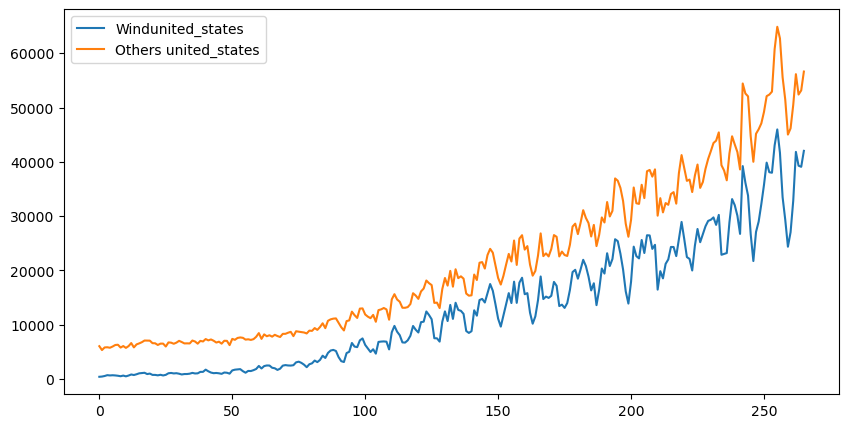

In [150]:
plt.figure(figsize = (10, 5))
for var in ["united_states"]:
    plt.plot(df["wind_" + var],label="Wind" + var)
    plt.plot(df["other_" + var],label="Others " + var)
    plt.legend()
    plt.show()
